In [27]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
#%load_ext autoreload
#%autoreload 2

In [31]:
#import importlib
#importlib.reload(upDn_baseCode)
from upDn_baseCode import *

In [32]:
eCharge=1.60217733e-19 # Coulombs; 
kBoltzmann=1.38065812e-20 #mJ/K
zeroT=273.15 #deg Kelvin
TCelcius = 36
v_T = kBoltzmann * (zeroT + TCelcius)/ eCharge
C_m = 20.0; vTCm= v_T * C_m
print(r'v_T=%g, C_m=%g, v_T C_m= %g'%(v_T,C_m, vTCm))

voltages = {'v_w':-10.0/v_T, 'v_m': -20.0/v_T,'v_U':60.0/v_T, 'v_D':-90.0/v_T, 'v_UD':-80.0/v_T}
biases = {'b_w':0.65, 'b_U':0.5, 'b_D':0.3, 'b_UD':0.1, 'g_m':4, 'g_w':2.4}
rates = {'r_w':0.25, 'a_F': 0*100 / vTCm, 'r_U':1, 'r_D':1, 'r_UD':1e-4, 'a_U': 4, 'a_D': 6, 'a_UD':800}
numerics = {'timeMin': -0.0, 'timeMax':300.0, 'timeStep':1/40.0, 'ic': np.array([0.0001, -60.0/v_T]),\
            'vMin':-100/v_T,'vMax':40/v_T, 'wMin':0,'wMax':1, 'vStep':0.1,'wStep':0.01}
p = {'v_T': v_T, 'C_m':C_m, 'vTCm': v_T * C_m, 'kappa_w':0.35}
p= {**p, **voltages, **biases, **rates, **numerics}
upDn = UD(params= p, variables=['w','v'])
upDn.vRange = np.arange(upDn.pars['vMin'],upDn.pars['vMax'],upDn.pars['vStep'])
upDn.wRange = np.arange(upDn.pars['wMin'],upDn.pars['wMax'],upDn.pars['wStep'])

v_T=26.6407, C_m=20, v_T C_m= 532.813
Setting w and v as state variables
self.w, self.v = sy.symbols(['w', 'v'])
Defining all functions. Notice v is normalized by v_T


### Dynamics from different initial conditions, spike duration, and dv/dt extrema

Max dv/dt = 293.389 V/s


(-1.0, 20.0)

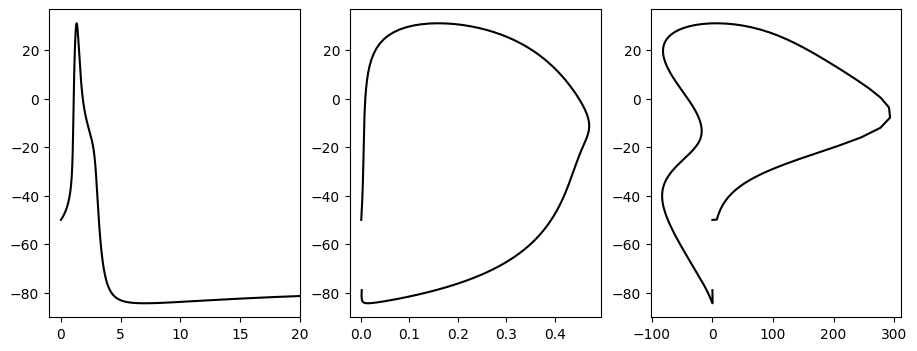

In [24]:
upDn.pars['v_m']= -20.0/v_T; upDn.pars['g_m']= 4;  
upDn.pars['v_w']= -10.0/v_T; upDn.pars['g_w']= 2.4; upDn.pars['b_w'] = 0.65; upDn.pars['kappa_w']=0.35; upDn.pars['r_w'] = 0.25
upDn.pars['b_D']= 0.3; #upDn.pars['b_UD']= 0.8
upDn.pars['a_F'] = 0 / vTCm; # 70 pA en rheobase 
upDn.pars['a_U'] = 4.; upDn.pars['a_D'] = 6; upDn.pars['a_UD'] = 800;
upDn.pars['timeMax'] = 100.0; upDn.pars['timeStep']=1/70.0; upDn.pars['ic'] = np.array([0.001, -50.0/v_T])
#
ics = np.arange(-90,49,10)/upDn.pars['v_T']
orbits = list()
for v0 in ics:
    upDn.pars['ic'][1] = ics
    orbits.append(upDn.getDynamics())
    
f = pl.figure(figsize=(11,4)); #pl.ioff(); 
ax = list(); rows = 1; cols= 3;
for n in range(rows*cols):
    ax.append(f.add_subplot(rows,cols,n+1))
    
ax[0].plot(upDn.timeSamples,upDn.uOrbit, 'k', label =r'$(t,v)')
ax[1].plot(upDn.wOrbit,upDn.uOrbit, 'k', label =r'$(w,v)')
ax[2].plot(upDn.dudt,upDn.uOrbit, 'k', label =r'$(\partial_t v,v)')
ax[0].set_xlim(-1,20)
